# Fraud Detection

### Objective

The project objective is to create a fraud detection system for financial transactions using advanced analytics and machine learning techniques. It aims to distinguish between legitimate and fraudulent behavior by employing anomaly detection, pattern recognition, and real-time monitoring. Through this system, we seek to enhance security, minimize financial losses, and protect individuals and organizations from deceptive activities in their transactions.

### Problem Statement
Detecting and preventing fraudulent activities within financial transactions is crucial for safeguarding individuals and organizations from potential losses and maintaining the integrity of financial systems. The problem at hand involves developing a robust fraud detection system leveraging advanced analytics and machine learning techniques. The primary objective is to accurately distinguish between legitimate and fraudulent behavior within financial transactions.

### Data frames

In [3]:
#Pandas Library Imported
import pandas as pd

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data Pre-processing

In [7]:
#Train-Test Split and Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
scalar = StandardScaler()

In [9]:
X = df.drop('Class', axis=1)
y = df.Class

In [10]:
X = scalar.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Modeling

In [12]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [13]:
model_svc = SVC()

### Fitting Support Vector Classifier

In [14]:
# Rename the SVC variable to model_svc
model_svc = SVC()

# Fit the model using the renamed variable
model_svc.fit(X_train, y_train)

SVC()

In [15]:
model_svc.score(X_train,y_train)

0.9996752178015756

In [16]:
model_svc.score(X_train,y_train)

0.9996752178015756

In [17]:
y_predict = model_svc.predict(X_train)

### Implementing Report

In [18]:
from sklearn.metrics import classification_report , confusion_matrix

In [19]:
import numpy as np

### Generating Confusion Matrix

In [20]:
cm = np.array(confusion_matrix(y_train, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,337,68
is Normal,6,227434


In [21]:
import seaborn as sns

### Heatmap Visualization of Confusion Matrix

<AxesSubplot:>

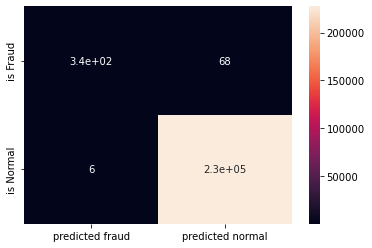

In [22]:
sns.heatmap(confusion, annot=True)

In [23]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227440
           1       0.98      0.83      0.90       405

    accuracy                           1.00    227845
   macro avg       0.99      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



### Conlusion
Fraud detection requires a multi-pronged approach. This includes anomaly detection, machine learning models like Logistic Regression and Neural Networks, feature engineering for enhanced accuracy, real-time monitoring systems, and scalable infrastructure to handle large transaction volumes. By integrating these elements, organizations can build robust fraud detection systems to safeguard against financial losses and maintain stakeholder trust.